In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_column',200)

In [2]:
df = pd.read_csv(r'C:\Users\ram\Desktop\Python Work\airlines_flights_data.csv')

In [3]:
df.shape


(300153, 12)

In [4]:
df.dtypes

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [5]:
df.drop(columns=['index'], inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df[['price', 'duration', 'days_left']].describe()


,price,duration,days_left
count,300153.000000,300153.000000,300153.000000
mean,20889.660523,12.221021,26.004751
std,22697.767366,7.191997,13.561004
min,1105.000000,0.830000,1.000000
25%,4783.000000,6.830000,15.000000
50%,7425.000000,11.250000,26.000000
75%,42521.000000,16.170000,38.000000
max,123071.000000,49.830000,49.000000


In [10]:
df['airline'].value_counts()
df['class'].value_counts()


class
Economy     206666
Business     93487
Name: count, dtype: int64

In [11]:
# Price Analysis
# Average price by airline
# Cheapest and most expensive routes

df.groupby('airline')['price'].mean().sort_values()

airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64

In [12]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [13]:
# Time-Based Analysis
# Price vs days left before departure
# Cheapest departure times
df.groupby('departure_time')['price'].mean().sort_values()

departure_time
Late_Night        9295.299387
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [14]:
# Stops vs Price Impact
df.groupby('stops')['price'].mean()

stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64

In [15]:
df['price'].describe()



count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

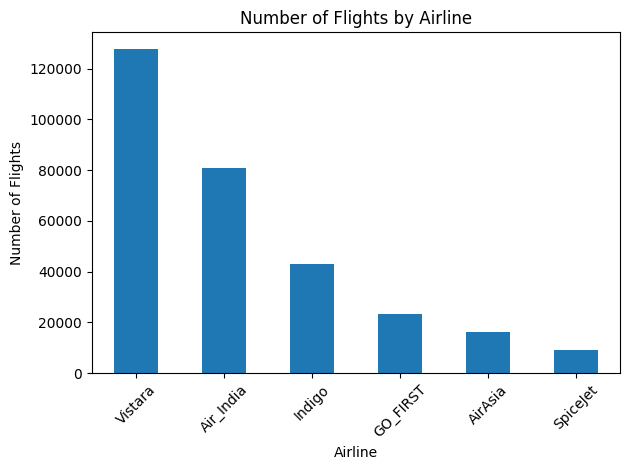

In [16]:
import matplotlib.pyplot as plt

airline_counts = df['airline'].value_counts()

airline_counts.plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


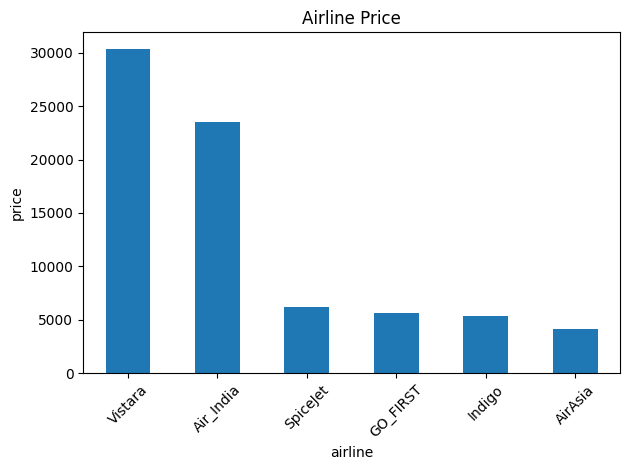

In [17]:
# Q1. Which airlines are positioned as low-cost vs premium?
ax = df.groupby('airline')['price'].mean().sort_values(ascending=False)
ax.plot(kind= 'bar')
plt.xlabel('airline')
plt.ylabel('price')
plt.title('Airline Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

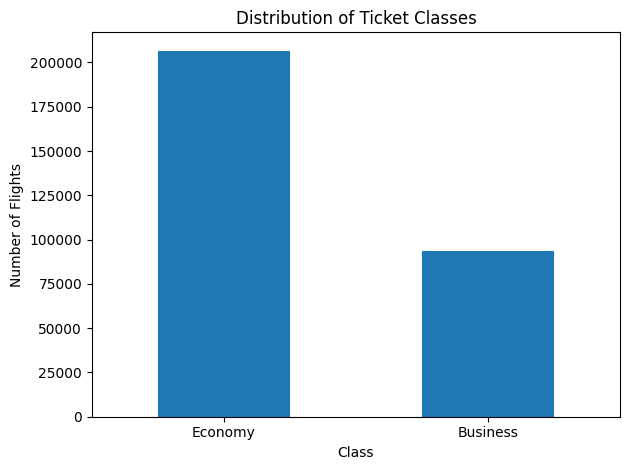

In [18]:
# Q2. How much more do customers pay for Business Class?

class_counts = df['class'].value_counts()

class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Flights')
plt.title('Distribution of Ticket Classes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


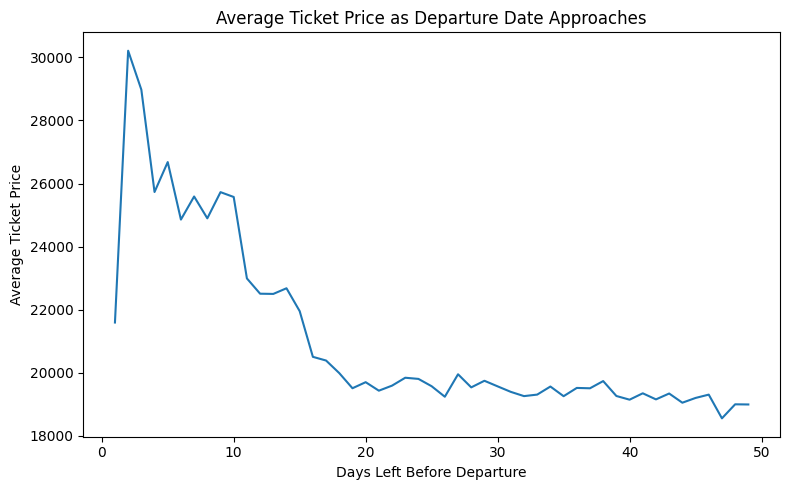

In [19]:
# Q3. Does booking earlier actually save money?

ax = df.groupby('days_left')['price'].mean().sort_index()

plt.figure(figsize=(8,5))
plt.plot(ax)
plt.xlabel('Days Left Before Departure')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price as Departure Date Approaches')
plt.tight_layout()
plt.show()

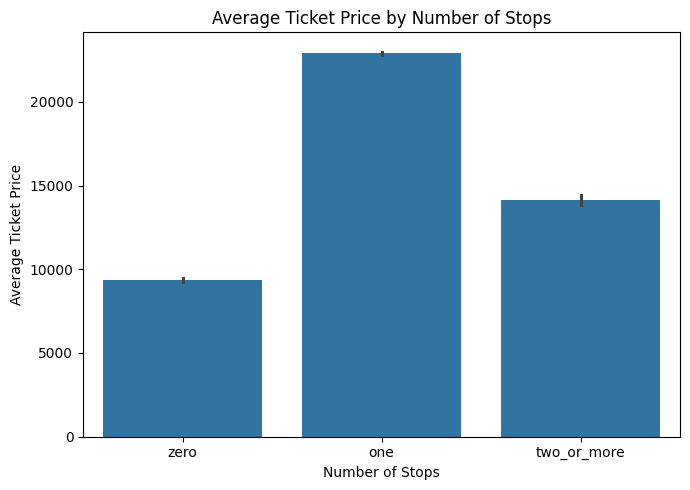

In [20]:
# Q4.How does the number of stops affect ticket pricing?

df.groupby('stops')['price'].mean()
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='stops', y='price')
plt.xlabel('Number of Stops')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Number of Stops')
plt.tight_layout()
plt.show()

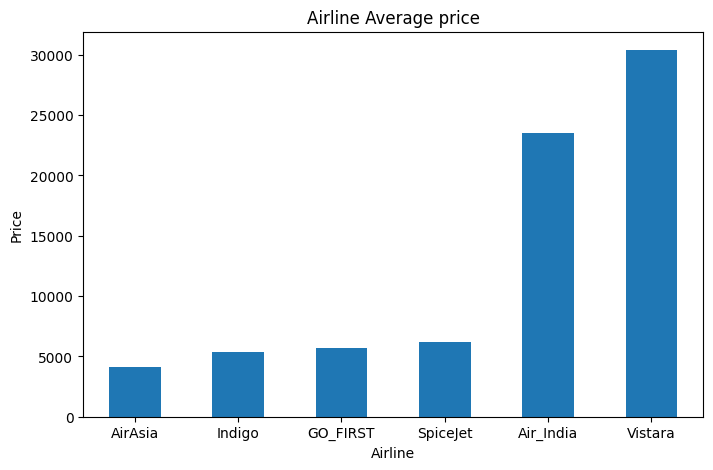

In [21]:
# Q5. Which airlines charge higher average prices compared to competitors?
# A. Vistara airlines charges higher average prices compared to others.

ax = df.groupby('airline')['price'].mean().sort_values()
plt.figure(figsize=(8,5))
ax.plot(kind='bar')
plt.xlabel("Airline")
plt.ylabel('Price')
plt.title('Airline Average price')
plt.xticks(rotation=0)
plt.tight_layout
plt.show()


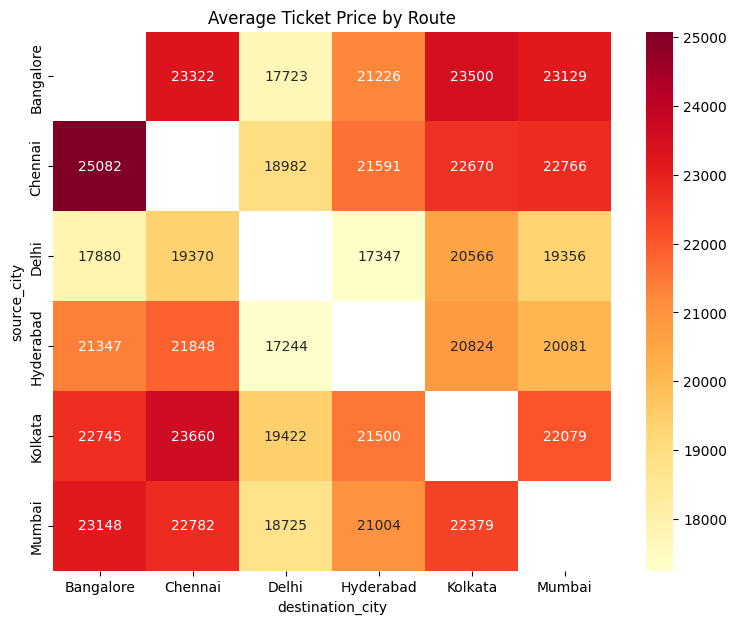

In [22]:
# Q6. Which source–destination pairs generate the highest average fares?
# A. Chennai to Bangalore has the highest average price.
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.groupby(
    ['source_city', 'destination_city']
)['price'].mean().unstack()

plt.figure(figsize=(9, 7))   # ← increase size here

sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Average Ticket Price by Route")
plt.show()




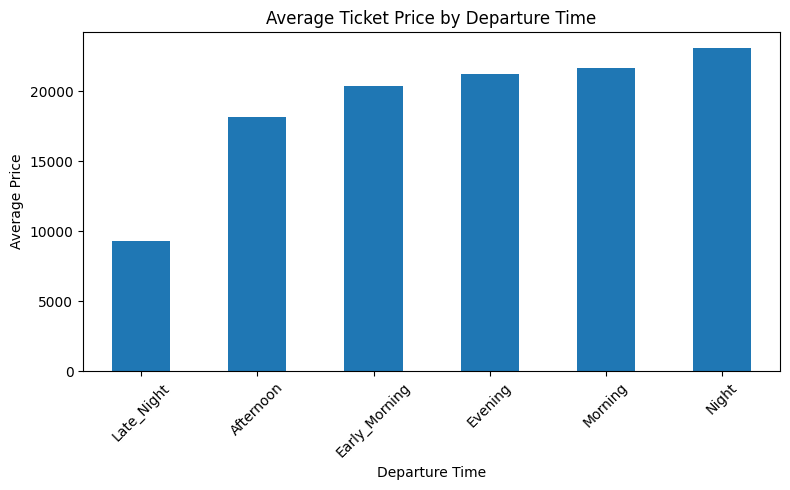

In [23]:
# Q7. Does departure time influence ticket pricing?
# A. Yes, Night time has the highest price.

ax = df.groupby('departure_time')['price'].mean().sort_values()

plt.figure(figsize=(8,5))          # figure size must come BEFORE plot
ax.plot(kind='bar')

plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.title('Average Ticket Price by Departure Time')
plt.xticks(rotation=45)
plt.tight_layout()                 # must have ()

plt.show()


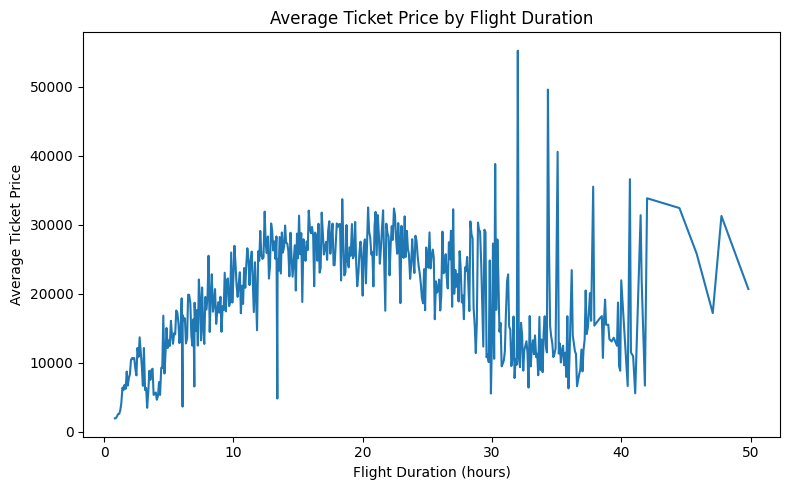

In [24]:
# Q8. Does flight duration affect pricing?
# A. Ticket prices generally increase with flight duration, but the relationship is influenced by other demand- and route-specific factors.

avg_price_duration = df.groupby('duration')['price'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_price_duration.index, avg_price_duration.values)
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Flight Duration')
plt.tight_layout()
plt.show()




